In [1]:
# Import packages
import pandas as pd
import numpy as np
import xml.etree.cElementTree as et
import spacy
import re
from nltk import tokenize
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib as plt
# from nrclex import NRCLex
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None) 

import nltk
import nltk.data
from os import listdir
from os.path import isfile, join

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

path = '/home/ec2-user/SageMaker/data//Global_Newsstream_Bernanke_Group_A_policy/'
files = [f for f in listdir(path) if isfile(join(path, f))]

In [2]:
# Function to strip html tags from text portion
def strip_html_tags(text):
    stripped = BeautifulSoup(text).get_text().replace('\n', ' ').replace('\\', '').strip()
    return stripped

def extract_meta(path, files):
#     tree=et.parse(path)
#     root=tree.getroot()

    meta = {'GOID': [], 
            'Title': [], 
#             'Contributors': [],
#             'Contributor FirstName': [],
#             'Contributor LastName': [],
            'Numeric Date': [],
#             'Start Date': [],
#             'End Date': [],
#             'Qualifier': [],
#             'Publisher Country': [],
#             'Language': [],
#             'Source': [],
#             'StartPage': [],
#             'DocSection': [],
#             'ColumnHeader': [],
#             'DocEdition': [],
#             'Title Keywords': [],
#             'Terms': [],
#             'Word Count': [],
#             'Title of Newspaper': [],
#             'Subjects': [],
#             'MpubId': [],
            'Text': []
            }
    
    for file in files:
        file_path = path+file
        tree=et.parse(file_path)
        root=tree.getroot()

        # iteratre over the trees to extract metadata
        for item in root.iter('GOID'):
            meta['GOID'].append(item.text)
            
#         if root.find('.//Title') is not None:
#             temp = []
#             for item in root.iter('.//Title'):
#                 temp.append(item.text)
#             meta['Title'].append(temp)
#         else:
#             meta['Title'].append('')

        if root.find('.//Title') is not None:
            meta['Title'].append(root.find('.//Title').text)
        else:
            meta['Title'].append('')
                
#         for item in root.iter('PubFrosting'):
#             for title in item.iter('Qualifier'):
#                 meta['Qualifier'].append(title.text)
#                 break

#         for item in root.iter('ISO'):
#             temp = []
#             temp.append(item[1].text.strip())
#         meta['Language'].append(temp)

#         # Contributor Info
#         if root.find('Contributors') is not None:
#             for item in root.iter('Contributors'):
#                 for contributor in item:
#                     if not meta['Contributors']:
#                         meta['Contributors'].append(contributor[0][0].text)
#                     else:
#                         meta['Contributors'].append('^^'+contributor[0][0].text)
#         else:
#             meta['Contributors'].append('')

#         if root.find('LastName') is not None:
#             for item in root.iter('LastName'):
#                 if not meta['Contributor LastName']:
#                     meta['Contributor LastName'].append(item.text)
#                 else:
#                     meta['Contributor LastName'].append('^^'+item.text)
#         else:
#             meta['Contributor LastName'].append('')

#         if root.find('FirstName') is not None:
#             for item in root.iter('FirstName'):
#                 if not meta['Contributor FirstName']:
#                     meta['Contributor FirstName'].append(item.text)
#                 else:
#                     meta['Contributor FirstName'].append('^^'+item.text)
#         else:
#             meta['Contributor FirstName'].append('')

        for item in root.iter('NumericDate'):
            meta['Numeric Date'].append(item.text)

#         for item in root.iter('SourceType'):
#             meta['Source'].append(item.text)

#         if root.find('LastName') is not None:
#             for item in root.iter('Country'):
#                 meta['Publisher Country'].append(item.text)
#         else:
#             meta['Publisher Country'].append('')

#         # PrintLocation Info
#         if root.find('StartPage') is not None:
#             for item in root.iter('StartPage'):
#                 temp = []
#                 temp.append(item.text)
#             meta['StartPage'].append(temp)
#         else:
#             meta['StartPage'].append('')

#         if root.find('DocSection') is not None:
#             for item in root.iter('DocSection'):
#                 meta['DocSection'].append(item.text)
#         else:
#             meta['DocSection'].append('')

#         if root.find('DocSection') is not None:
#             for item in root.iter('ColumnHeader'):
#                 meta['ColumnHeader'].append(item.text)
#         else:
#             meta['ColumnHeader'].append('')

            
#         if root.find('DocEdition') is not None:
#             for item in root.iter('DocEdition'):
#                 meta['DocEdition'].append(item.text)
#         else:
#             meta['DocEdition'].append('')

#         if root.find('Terms') is not None:
#             for title in root.iter('Terms'):
#                 terms = [title.tag, title.attrib, title.text.strip()]
#                 for item in title:
#                     item_info = [item.tag, item.attrib, item.text.strip()]
#                     for sub in item:
#                         item_info.append(sub.tag)
#                         item_info.append(sub.attrib)
#                         item_info.append(sub.text)
#                     terms.append(item_info)
#                 meta['Terms'].append(terms)
#         else:
#             meta['Terms'].append('')

#         # for title in root.iter('GenSubjTerm'):
#         #     terms = [title.tag, title.attrib, title.text.strip()]
#         #     for item in title:
#         #         terms.append(item.tag)
#         #         terms.append(item.attrib)
#         #     meta['Subject Terms'].append(item.text)

#         for item in root.iter('PubFrosting'):
#             for title in item.iter('Title'):
#                 meta['Title of Newspaper'].append(item[2].text)
#                 break

#         if root.find('PubFrosting') is not None:
#             for item in root.iter('PubFrosting'):
#                 for title in root.iter('Subjects'):
#                     meta['Subjects'].append(title[0].text)
#         else:
#             meta['Subjects'].append('')

#         if root.find('TextInfo') is not None:
#             for item in root.iter('TextInfo'):
#                 for title in item:
#                     meta['Word Count'].append(title.attrib['WordCount'])
#         else:
#             meta['Word Count'].append('')

#         # df_meta = pd.DataFrame(data=meta)

#         for item in root.iter('PubFrosting'):
#             for title in root.iter('MpubId'):
#                 meta['MpubId'].append(title.text)

#         for item in root.iter('PubFrosting'):
#             for title in root.iter('StartDate'):
#                 meta['Start Date'].append(title.text)
#                 break
#             for title in root.iter('EndDate'):
#                 meta['End Date'].append(title.text)
#                 break


        
        if root.find('.//FullText') is not None:
            meta['Text'].append(strip_html_tags(root.find('.//FullText').text))
        elif root.find('.//HiddenText') is not None:
            meta['Text'].append(strip_html_tags(root.find('.//HiddenText').text))
        elif root.find('.//Text') is not None:
            meta['Text'].append(strip_html_tags(root.find('.//Text').text))
        else:
            meta['Text'].append('')

        # add na if any header info is not found
#         for k in meta:
#             if not meta[k]:
#                 meta[k].append('n/a')
#     for key,value in meta.items():
#         print(key, len(value))

    return meta
# path = '/home/ec2-user/SageMaker/data/Global_Newsstream_Yellen_2014/'

# 2083619274.xml do not have start and end date

meta = extract_meta(path, files)

meta_df = pd.DataFrame(data=meta)
# meta_df.head()

In [3]:
def getTopKWords(df, kwords):

    stop = set(nltk.corpus.stopwords.words('english'))
    counter = Counter()

    texts = df['Text'].values

    for text in texts:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', text) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [4]:
# getTopKWords(meta_df, 5)

In [5]:
# for sentiment analysis
from spacytextblob.spacytextblob import SpacyTextBlob
import nltk
import spacy
nlp = spacy.load('/home/ec2-user/SageMaker/Getting Started/2022.05.25/Resources/Models/en_core_web_sm-3.2.0/en_core_web_sm/en_core_web_sm-3.2.0')
nlp.add_pipe('spacytextblob')

In [6]:
# Parse the xml by paragraph and sentence
def extract_paragraphs_new(path):
    tree=et.parse(path)
    root=tree.getroot()
    del_list = []
    full = ''
    for text in root.iter('Text'):
        full = text.text
    for i in range(len(full)):
        if full[i:i+3] == '<p>':
            del_list.append(i)
    temp = {'Paragraph': [], 'Sentence': [], 'Overall Sentence': [], 'Text': []}
    sentence_count = 1
    #temp = {'Paragraph': [], 'Text': []}
    for i in range(len(del_list)-1):
        text = full[(del_list[i]+3):(del_list[i+1])]
        text = text.replace("\n","")
        text = text.replace("<p>","")
        text = text.replace("</p>","")
        text = text.replace("<i>","")
        text = text.replace("</i>","")
        text = text.replace("<b>","")
        text = text.replace("</b>","")
        all_sen = tokenize.sent_tokenize(text)
        for j in range(len(all_sen)):
            temp['Paragraph'].append(i+1)
            temp['Sentence'].append(j+1)
            temp['Overall Sentence'].append(sentence_count)
            temp['Text'].append(all_sen[j])
            sentence_count += 1
    df = pd.DataFrame(data=temp)
    return df

In [7]:
def get_tags(sentence):
    """Return POS tags of each sentence."""
    res = []
    for token in nlp(sentence):
        res.append((token.text, token.pos_, token.dep_))
    return res
def get_polarity(sentence):
    """Return polarity score of each sentence."""
    token = nlp(sentence)
    polarity = token._.blob.polarity
    return polarity
def get_subjectivity(sentence):
    """Return subjectivity score of each sentence."""
    token = nlp(sentence)
    subjectivity = token._.blob.subjectivity
    return subjectivity
def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc."""
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc
    ]

def tidy_tokens(docs):
    """Extract tokens and metadata from list of spaCy docs."""
    
    cols = [
        "doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"
    ]
    
    meta_df = []
    for ix, doc in enumerate(docs):
        meta = extract_tokens_plus_meta(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)
        
    return pd.concat(meta_df) 

In [7]:
meta_df['Text'].replace('', np.nan, inplace=True)
meta_df.dropna(subset=['Text'], inplace=True)


In [8]:
meta_df.Text = meta_df.Text.apply(lambda x: x.replace("”","\""))
meta_df.Text = meta_df.Text.apply(lambda x: x.replace("“","\""))
meta_df.Text = meta_df.Text.apply(lambda x: x.replace("’","'"))
meta_df.Text = meta_df.Text.apply(lambda x: x.replace("—","-"))
meta_df.Text = meta_df.Text.apply(lambda x: re.sub("\.([-]{1})", r'. ', x))

# solve . connected to captical
meta_df.Text = meta_df.Text.apply(lambda x: re.sub("\.([A-Z]{1})", r'. \1', x))

# remove link
meta_df.Text = meta_df.Text.apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", x))



In [9]:
matches_A = ['Bernanke','Federal Reserve Chair','Fed Chair', 'Fed Chairman', 'Federal Reserve Chairman']

matches_B_first = ['testif*', 'report*', 'testim*', 'deliver*', 'monetary policy report', 'humphrey hawkins', 'humphreyhawkins', 'semiannual report', 'semi-annual report']

matches_B_second = ['congress', 'senate', 'congressional', 'committee', 'house of representatives', 'on the hill', 'Capitol']

In [10]:
meta_df['sentContainInfo'] = meta_df.apply(lambda x: [sentence for sentence in tokenizer.tokenize(x['Text']) \
                                            if any(match.lower() in sentence.lower() for match in matches_A)\
                                            or (any(match.lower() in sentence.lower() for match in matches_B_first)\
                                               and any(match.lower() in sentence.lower() for match in matches_B_second))], axis=1)


In [11]:
meta_df = meta_df.explode(['sentContainInfo']).reset_index(drop=True)

In [12]:
meta_df.head()

GOID                                                          Title  \
0   851940715                               Man of the year 2010 [ET Cetera]   
1   758587644                              Bernanke backs qualitative easing   
2   758587644                              Bernanke backs qualitative easing   
3   758587644                              Bernanke backs qualitative easing   
4  2201181439  MARKET TALK: Hungary Bonds Hardly Move After In-Line 50BP Cut   

  Numeric Date  \
0   2011-01-05   
1   2010-10-16   
2   2010-10-16   
3   2010-10-16   
4   2009-10-19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [13]:
meta_df.to_csv('bernanke_group_A.csv',index=False)

In [12]:
meta_df_sentence = meta_df[['GOID', "Title", "Numeric Date", "sentContainInfo"]]
meta_df_whole_sent = meta_df[['GOID', "Title", "Numeric Date", "Text"]]

In [13]:
meta_df_sentence['sentContainInfo'] = meta_df_sentence.apply(lambda x: (".").join(x['sentContainInfo']),axis=1)

/tmp/ipykernel_12876/2253872979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df_sentence['sentContainInfo'] = meta_df_sentence.apply(lambda x: (".").join(x['sentContainInfo']),axis=1)


In [14]:
meta_df_whole_sent['polarity'] = meta_df_whole_sent.apply(lambda x: get_polarity(x['Text']), axis = 1)
meta_df_whole_sent['subjectivity'] = meta_df_whole_sent.apply(lambda x: get_subjectivity(x['Text']), axis = 1)

/tmp/ipykernel_12876/2673024182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df_whole_sent['polarity'] = meta_df_whole_sent.apply(lambda x: get_polarity(x['Text']), axis = 1)
/tmp/ipykernel_12876/2673024182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df_whole_sent['subjectivity'] = meta_df_whole_sent.apply(lambda x: get_subjectivity(x['Text']), axis = 1)


In [15]:
meta_df_sentence['polarity'] = meta_df_sentence.apply(lambda x: get_polarity(x['sentContainInfo']), axis = 1)
meta_df_sentence['subjectivity'] = meta_df_sentence.apply(lambda x: get_subjectivity(x['sentContainInfo']), axis = 1)

/tmp/ipykernel_12876/2322652181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df_sentence['polarity'] = meta_df_sentence.apply(lambda x: get_polarity(x['sentContainInfo']), axis = 1)
/tmp/ipykernel_12876/2322652181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df_sentence['subjectivity'] = meta_df_sentence.apply(lambda x: get_subjectivity(x['sentContainInfo']), axis = 1)


In [16]:
meta_df_whole_sent.to_csv('yellen_sentences.csv',index=False)

In [17]:
meta_df_sentence.to_csv('yellen_articles.csv',index=False)

In [ ]:
meta_df['polarity'] = meta_df.apply(lambda x: get_polarity(x['Text']), axis = 1)

In [9]:
meta_df['subjectivity'] = meta_df.apply(lambda x: get_subjectivity(x['Text']), axis = 1)

In [24]:
meta_df['Numeric Date'] = pd.to_datetime(meta_df['Numeric Date'])

In [25]:
meta_df["day"] = meta_df['Numeric Date'].map(lambda x: x.day)
meta_df["month"] = meta_df['Numeric Date'].map(lambda x: x.month)
meta_df["year"] = meta_df['Numeric Date'].map(lambda x: x.year)

In [27]:
avg_by_day_df = meta_df.groupby("Numeric Date")[["polarity","subjectivity"]].mean().reset_index()

In [42]:
avg_day_df = meta_df.groupby(['year', 'month', 'day'])[["polarity","subjectivity"]].mean().reset_index()
avg_day_avg_month_df = avg_day_df.groupby(['year', 'month'])[["polarity","subjectivity"]].mean().reset_index()
avg_day_avg_month_df["date"] = avg_day_avg_month_df["year"].astype(str) + '_' +avg_day_avg_month_df["month"].astype(str)
# .plot.line(x='Numeric Date', y='subjectivity', title='Subjectivity averaged by days')

<AxesSubplot: title={'center': 'Subjectivity over years'}, xlabel='Numeric Date'>

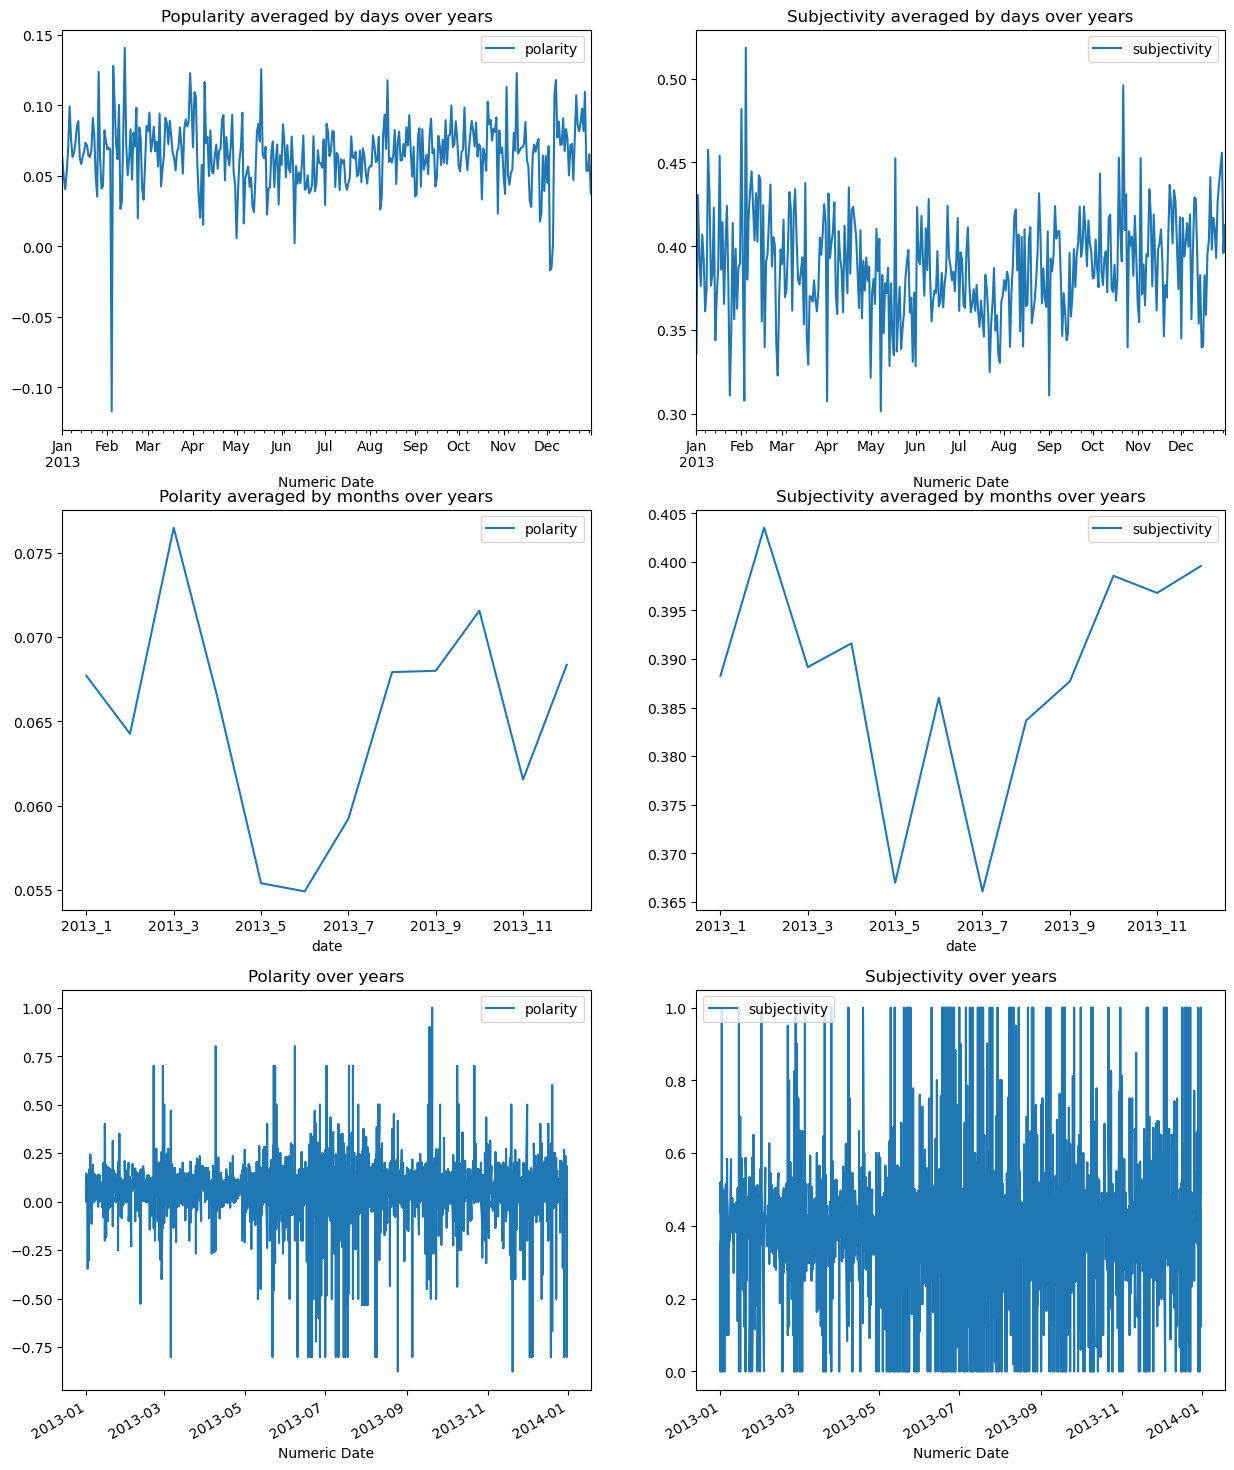

In [63]:
fig, axes = plt.pyplot.subplots(nrows=3, ncols=2)
figsize = (15,20)
avg_by_day_df.plot.line(x='Numeric Date', y='polarity', title='Popularity averaged by days over years', ax=axes[0,0], figsize=figsize)
avg_by_day_df.plot.line(x='Numeric Date', y='subjectivity', title='Subjectivity averaged by days over years', ax=axes[0,1], figsize=figsize)
avg_day_avg_month_df.plot.line(x='date', y='polarity', title='Polarity averaged by months over years', ax=axes[1,0], figsize=figsize)
avg_day_avg_month_df.plot.line(x='date', y='subjectivity', title='Subjectivity averaged by months over years', ax=axes[1,1], figsize=figsize)
meta_df.plot.line(x='Numeric Date', y='polarity', title='Polarity over years', ax=axes[2,0], figsize=figsize)
meta_df.plot.line(x='Numeric Date', y='subjectivity', title='Subjectivity over years', ax=axes[2,1], figsize=figsize)

In [65]:
fig.savefig('plot.png')

In [10]:
new_meta_df = meta_df[['GOID','Title','Numeric Date','Start Date','End Date','Text']]

In [11]:
new_meta_df['polarity'] = meta_df.apply(lambda x: get_polarity(x['Text']), axis = 1)

In [14]:
print(new_meta_df['polarity'])

In [ ]:
new_meta_df['subjectivity'] = meta_df.apply(lambda x: get_subjectivity(x['Text']), axis = 1)

/tmp/ipykernel_8390/2774909292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_meta_df['subjectivity'] = meta_df.apply(lambda x: get_subjectivity(x['Text']), axis = 1)


In [21]:
def get_number(all_id, all_path):
    temp = {'GOID': all_id, 'Paragraph Number': [], 'Sentence Number': []}
    for i in range(len(all_path)):
        extracts = extract_paragraphs_new(all_path[i])
        temp['Paragraph Number'].append(extracts['Paragraph'].max())
        temp['Sentence Number'].append(extracts['Overall Sentence'].max())
    df = pd.DataFrame(data=temp)   
    return df

In [23]:
extract_paragraphs_new("/home/ec2-user/SageMaker/data/Global_Newsstream_2013_bernanke/1442154774.xml")

,Paragraph,Sentence,Overall Sentence,Text


In [24]:
get_number(["1265838760"], ["/home/ec2-user/SageMaker/data/Global_Newsstream_2013_bernanke/1442154774.xml"])

,GOID,Paragraph Number,Sentence Number
0,1265838760,NaN,NaN


In [31]:
%ls "/home/ec2-user/SageMaker/data/Global_Newsstream_2013_bernanke/1265819747.xml"

1265819747.xml  1354797831.xml  1373196381.xml  1419321623.xml  1442154519.xml
1265848948.xml  1354799215.xml  1373196385.xml  1419328392.xml  1442154676.xml
1265849332.xml  1354799222.xml  1373196386.xml  1419328409.xml  1442154774.xml
1265872518.xml  1354801459.xml  1373196388.xml  1419345953.xml  1442154817.xml
1265872789.xml  1354828851.xml  1373196389.xml  1419349132.xml  1442154956.xml
1265872886.xml  1354828856.xml  1373196392.xml  1419349298.xml  1442155224.xml
1265876318.xml  1354839161.xml  1373200873.xml  1419349349.xml  1442155240.xml
1265876780.xml  1354874793.xml  1373200879.xml  1419356523.xml  1442155251.xml
1265910171.xml  1354874908.xml  1373201023.xml  1419374339.xml  1442155307.xml
1265910427.xml  1354874915.xml  1373201419.xml  1419396706.xml  1442155361.xml
1265917753.xml  1354875564.xml  1373202405.xml  1419397051.xml  1442155883.xml
1265944927.xml  1354878351.xml  1373204222.xml  1419404326.xml  1442156300.xml
1265944987.xml  1354879096.xml  1373216025.xml  1419

1336131912.xml  1370486613.xml  1411050159.xml  1434937617.xml  1470918360.xml
1336518914.xml  1370487582.xml  1411050525.xml  1434937941.xml  1470963895.xml
1336747929.xml  1370488237.xml  1411074017.xml  1434982456.xml  1470965168.xml
1337851051.xml  1370489783.xml  1411077441.xml  1434982472.xml  1470965657.xml
1337924261.xml  1370491613.xml  1411078136.xml  1434982643.xml  1470980789.xml
1337924409.xml  1370491629.xml  1411078719.xml  1434987503.xml  1470987676.xml
1338034312.xml  1370492160.xml  1411078875.xml  1434991772.xml  1470990291.xml
1340776893.xml  1370492477.xml  1411078956.xml  1434991986.xml  1471011509.xml
1340884198.xml  1370492479.xml  1411091282.xml  1435002635.xml  1471011559.xml
1340941437.xml  1370492821.xml  1411093711.xml  1435012084.xml  1471013831.xml
1340948649.xml  1370492829.xml  1411098809.xml  1435012148.xml  1471020461.xml
1343935374.xml  1370492832.xml  1411100045.xml  1435012519.xml  1471025710.xml
1344794239.xml  1370492884.xml  1411105205.xml  1435

In [27]:
path = "/home/ec2-user/SageMaker/data/Global_Newsstream_2013_bernanke/1442154774.xml"